# Project code trial 6

In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing sample dataset for our model
dataset= pd.read_csv("Datasets/sample.csv")
#print head of our dataset or top 5 rows of our dataset
dataset.head()

,Item,holding_cost,ordering_cost,purchase_cost,rate,demand,setup_cost
0,item1,2498,1474,5895,60,34,150
1,item1,4082,2476,2079,68,35,151
2,item1,1410,1735,5652,76,34,173
3,item1,4760,3032,3923,46,20,191
4,item1,4842,2491,2087,200,49,195


In [3]:
#return all the columns of our dataset
dataset.columns

Index(['Item', 'holding_cost', 'ordering_cost', 'purchase_cost', 'rate',
       'demand', 'setup_cost'],
      dtype='object')

In [4]:
#describe or summarise our dataset 
dataset.describe()

,holding_cost,ordering_cost,purchase_cost,rate,demand,setup_cost
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,3155.80000,2379.720000,3711.580000,103.12000,31.380000,151.040000
std,1214.33894,937.299857,1171.189123,53.65979,10.838122,31.490173
min,1015.00000,1054.000000,2020.000000,20.00000,11.000000,103.000000
25%,2382.25000,1550.000000,2719.250000,61.25000,23.000000,122.250000
50%,3164.50000,2338.000000,3616.000000,96.50000,32.500000,153.000000
75%,4138.25000,3063.500000,4679.250000,148.75000,38.750000,182.250000
max,4974.00000,3969.000000,5895.000000,200.00000,50.000000,199.000000


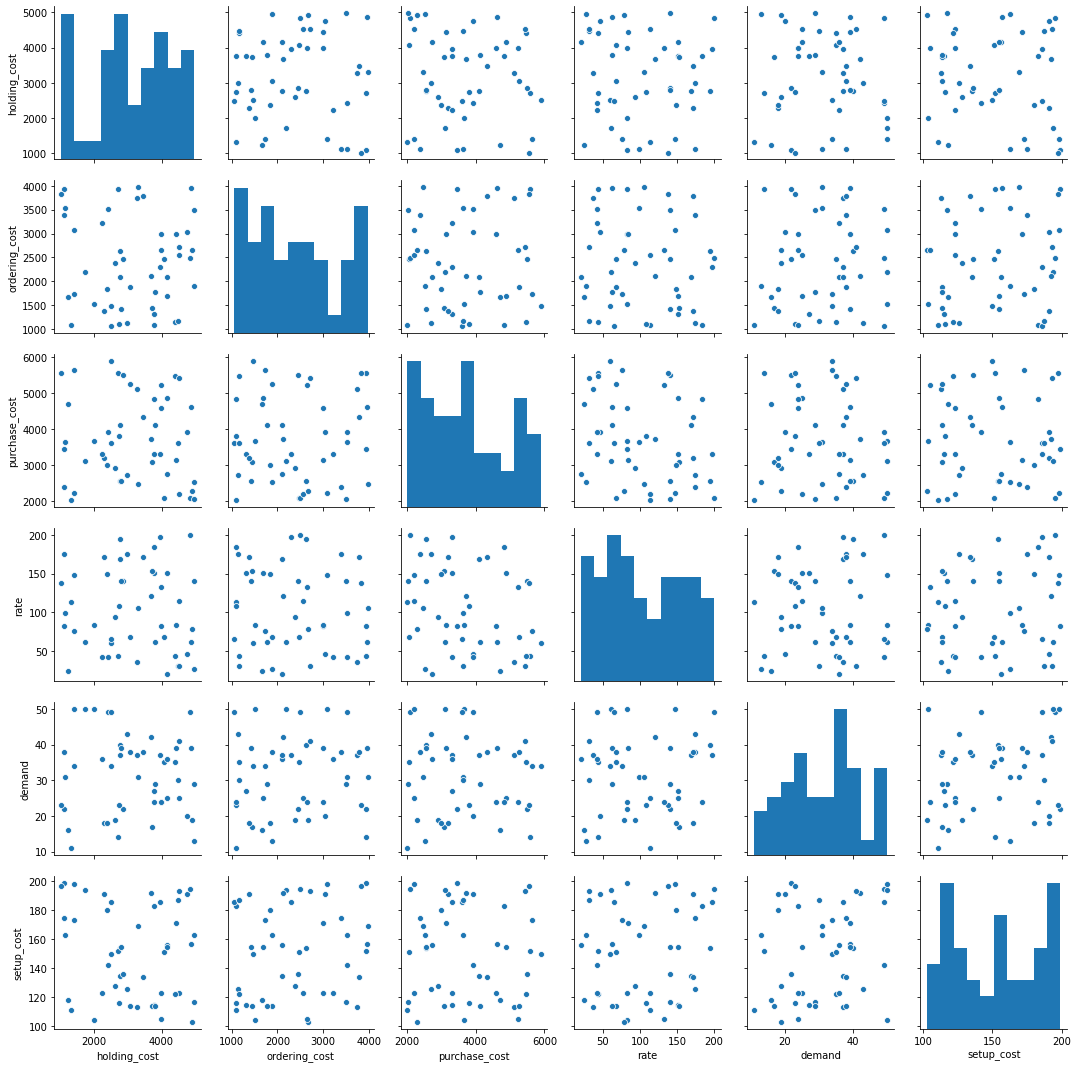

In [5]:
#pairplot defines the relationship between various columns in our dataset
sns.pairplot(dataset)

### Calculating Economic Order Quantity 

In [6]:
#Add a new column in our dataset for calculating economic order quantity
dataset["eoq"]=np.sqrt((2*dataset["demand"]*dataset["setup_cost"])/dataset["holding_cost"])
#and again print the head of our dataset
dataset.head()

,Item,holding_cost,ordering_cost,purchase_cost,rate,demand,setup_cost,eoq
0,item1,2498,1474,5895,60,34,150,2.020709
1,item1,4082,2476,2079,68,35,151,1.609167
2,item1,1410,1735,5652,76,34,173,2.888471
3,item1,4760,3032,3923,46,20,191,1.266903
4,item1,4842,2491,2087,200,49,195,1.986634


In [7]:
#also add a new column to show the total cost 
dataset["total_cost"]=dataset["holding_cost"]+dataset["ordering_cost"]+dataset["purchase_cost"]
dataset.head()

,Item,holding_cost,ordering_cost,purchase_cost,rate,demand,setup_cost,eoq,total_cost
0,item1,2498,1474,5895,60,34,150,2.020709,9867
1,item1,4082,2476,2079,68,35,151,1.609167,8637
2,item1,1410,1735,5652,76,34,173,2.888471,8797
3,item1,4760,3032,3923,46,20,191,1.266903,11715
4,item1,4842,2491,2087,200,49,195,1.986634,9420


In [8]:
#again describe our data as we have 2 new columns in our dataset
dataset.describe()

,holding_cost,ordering_cost,purchase_cost,rate,demand,setup_cost,eoq,total_cost
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,3155.80000,2379.720000,3711.580000,103.12000,31.380000,151.040000,1.841546,9247.100000
std,1214.33894,937.299857,1171.189123,53.65979,10.838122,31.490173,0.672142,1861.541782
min,1015.00000,1054.000000,2020.000000,20.00000,11.000000,103.000000,0.892015,4423.000000
25%,2382.25000,1550.000000,2719.250000,61.25000,23.000000,122.250000,1.365468,7921.000000
50%,3164.50000,2338.000000,3616.000000,96.50000,32.500000,153.000000,1.699489,9336.500000
75%,4138.25000,3063.500000,4679.250000,148.75000,38.750000,182.250000,2.065030,10488.250000
max,4974.00000,3969.000000,5895.000000,200.00000,50.000000,199.000000,3.763388,13445.000000


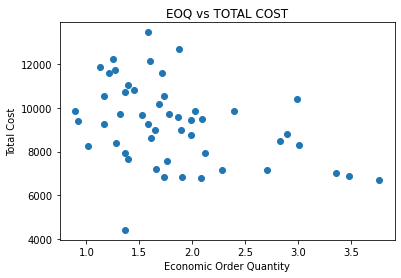

In [9]:
#show relationship between eoq and total cost 
plt.scatter(dataset["eoq"],dataset["total_cost"])
plt.title("EOQ vs TOTAL COST")
plt.xlabel("Economic Order Quantity")
plt.ylabel("Total Cost")
plt.show()

### Optimise EOQ using genetic algorithm

In [10]:
#input to our model is population that is eoq column in 1d array
population = dataset["eoq"].values.flatten() 
#number of weights or items we are looking to optimise
weights = len(population)
#number of solution per solution ,here we take 50 solution for our population that includes 50 individuals
sol_per_pop = 50
#population size that holds our population 50 weights in 50 solution
pop_size=(sol_per_pop,weights)
#now new population or actual population on which we are going to prepare our model
new_population=np.random.uniform(low=np.min(population),high=np.max(population),size=pop_size)
print(new_population)

[[3.16426772 2.17836054 1.46231071 ... 2.07407401 3.43824206 1.33645822]
 [1.89430216 2.3433205  3.08505043 ... 3.50728959 1.28102921 1.71777371]
 [1.57081583 1.88566432 1.08695826 ... 0.97893958 2.9866845  2.01289263]
 ...
 [1.94591291 2.67004962 1.96626355 ... 1.76025936 1.8488011  1.88356495]
 [2.41983634 3.45585726 1.83956221 ... 1.65384016 2.22279967 1.73872434]
 [3.73038099 3.00154381 1.8640004  ... 2.37377547 1.63049747 1.3048755 ]]


In [11]:
# GA class or module that is imported from 
# whose functions we are going to use for our model
class GA:
    def cal_pop_fitness(equation_inputs, pop):
        # Calculating the fitness value of each solution in the current population.
        # The fitness function calulates the sum of products between each input and its corresponding weight.
        fitness = np.sum(pop*equation_inputs, axis=1)
        return fitness

    def select_mating_pool(pop, fitness, num_parents):
        # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
        parents = np.empty((num_parents, pop.shape[1]))
        for parent_num in range(num_parents):
            max_fitness_idx = np.where(fitness == np.max(fitness))
            max_fitness_idx = max_fitness_idx[0][0]
            parents[parent_num, :] = pop[max_fitness_idx, :]
            fitness[max_fitness_idx] = -99999999999
        return parents

    def crossover(parents, offspring_size):
        offspring = np.empty(offspring_size)
        # The point at which crossover takes place between two parents. Usually, it is at the center.
        crossover_point = np.uint8(offspring_size[1]/2)

        for k in range(offspring_size[0]):
            # Index of the first parent to mate.
            parent1_idx = k%parents.shape[0]
            # Index of the second parent to mate.
            parent2_idx = (k+1)%parents.shape[0]
            # The new offspring will have its first half of its genes taken from the first parent.
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            # The new offspring will have its second half of its genes taken from the second parent.
            offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        return offspring

    def mutation(offspring_crossover, num_mutations=1):
        mutations_counter = np.uint8(offspring_crossover.shape[1] / num_mutations)
        # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
        for idx in range(offspring_crossover.shape[0]):
            gene_idx = mutations_counter - 1
            for mutation_num in range(num_mutations):
                # The random value to be added to the gene.
                random_value = np.random.uniform(-1.0, 1.0, 1)
                offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
                gene_idx = gene_idx + mutations_counter
        return offspring_crossover

In [12]:
#number of generations is 5 to present results of all generation easily
num_generations=5

num_parents_mating=4
for generation in range(num_generations):
    # Measuring the fitness of each chromosome in the population according to the rate of total order items
    fitness = GA.cal_pop_fitness(dataset["rate"].values.flatten(),new_population)
    # Selecting the best parents in the population for mating where fitness is maximum 
    parents = GA.select_mating_pool(new_population, fitness,num_parents_mating)
    # Generating next generation using crossover that accepts the parents and the offspring size in a ring order 
    offspring_crossover = GA.crossover(parents,offspring_size=(pop_size[0]-parents.shape[0], weights))
    # Adding some variations to the offsrping using mutation using single point crossover
    offspring_mutation = GA.mutation(offspring_crossover)
    # Creating the new population based on the parents and offspring.
    #new_population[0:parents.shape[0], :] = parents
    #new_population[parents.shape[0]:, :] = offspring_mutation

In [13]:
# Getting the best solution after iterating finishing all generations.
best_match_idx = np.where(fitness == np.max(fitness))
print("Optimised Solution :")
print(new_population[best_match_idx, :])

Optimised Solution :
[[[3.38636699 2.60743727 2.20611293 1.57868471 3.65408889 1.5418755
   1.36765893 1.89801591 3.75666282 2.69198065 1.7776707  2.791226
   1.91068251 3.68992451 1.14308025 3.20934314 2.95994139 2.48668921
   1.94509862 3.00035724 1.75950217 3.18952567 2.86965727 3.71113709
   3.00990987 3.14099534 3.41878374 2.16876646 1.88973889 1.631213
   1.72461491 1.68904339 1.71339523 1.21794983 3.01085887 3.10858455
   0.94934665 2.52555744 1.67457262 3.25531985 3.42029737 3.51386126
   1.98349611 2.34614443 1.26720933 1.34400239 2.36119173 1.20177484
   2.067562   1.10779388]]]
